In [132]:
import os
import pickle

import cv2
import numpy as np
from tqdm import tqdm
import skimage.io as io
from sklearn import metrics
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

from vedaseg.utils import Config
from vedaseg.datasets import build_dataset
from vedaseg.runners import InferenceRunner
from vedaseg.transforms import build_transform

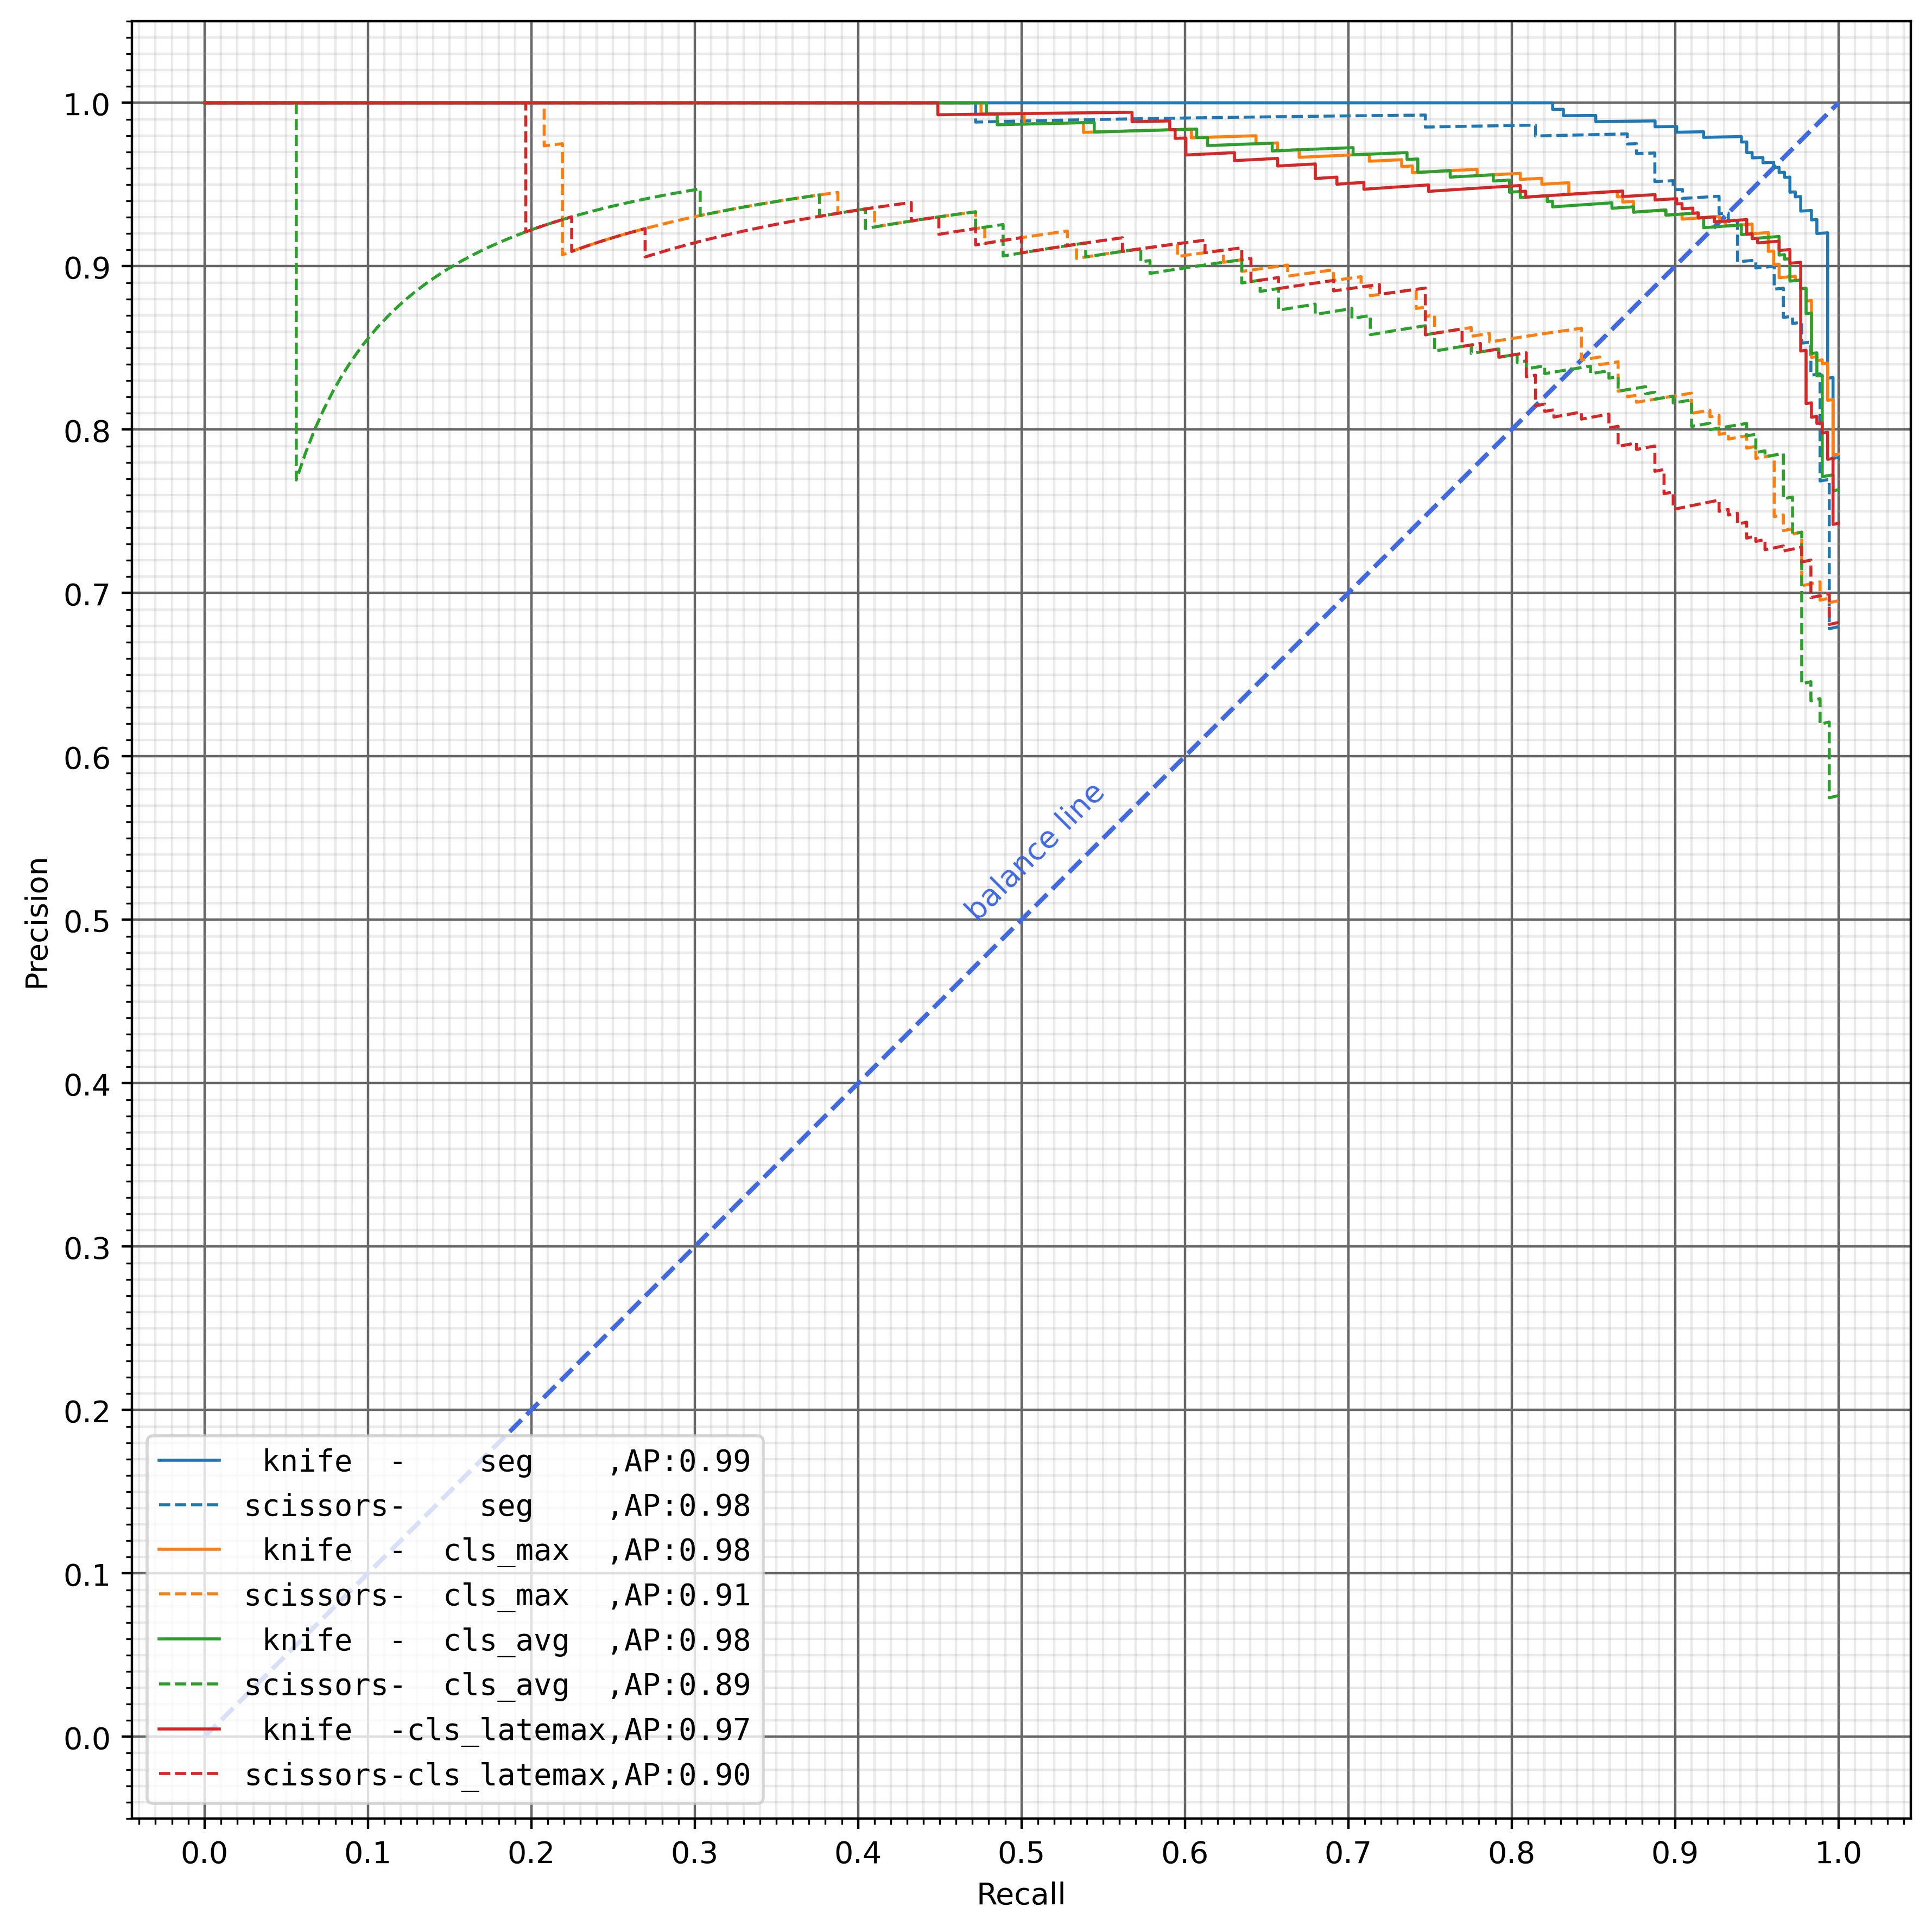

In [367]:
dataset_name = 'ks0'
dataset_type = 'val'
# model_name = 'seg'  # 'cls_latemax'
cat_name = ['knife', 'scissors']
# cat_id = [0, 1]
cat_id = [0, 1]
color_per_model = {
    'seg':'C0', 
    'cls_max':'C1', 
    'cls_avg':'C2', 
    'cls_latemax':'C3'
}
style_per_cat = ['-', '--']

precision = dict()
recall = dict()
thres = dict()
average_precision = dict()
fig = plt.figure(11, figsize=(9, 9), dpi=400)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.01])
plt.minorticks_on()

fig.axes[0].xaxis.set_major_locator(MultipleLocator(0.1))
fig.axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
fig.axes[0].xaxis.set_minor_locator(MultipleLocator(0.01))
fig.axes[0].yaxis.set_minor_locator(MultipleLocator(0.01))
fig.axes[0].axis('equal')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.plot(np.arange(0.0, 1.01, 0.01), 
         np.arange(0.0, 1.01, 0.01), 
         color='royalblue', 
         linestyle='--')
plt.annotate("balance line", xy=(0.5, 0.5), color='royalblue', 
             rotation=45, xytext=(-20, 0), textcoords='offset points')

for model_name in color_per_model:
# for model_name in ['cls_latemax']:
    target_folder = os.path.join('res_pkls', dataset_name, model_name)
    label_fn = os.path.join(target_folder, f'label_{dataset_type}.pkl')
    score_fn = os.path.join(target_folder, f'score_{dataset_type}.pkl')

    with open(label_fn, 'rb') as l_f:
        label_list = pickle.load(l_f)
        if 'val' in label_fn:
            label_list[116, 1] = 1
    

    with open(score_fn, 'rb') as s_f:
        score_list = pickle.load(s_f)
        if 'ks1' in label_fn and 'test' in label_fn:
            score_list[650, i] = 0
#         score_list[116, i] = 0

    for i in cat_id:
#     for i in [1]:
        precision[i], recall[i], thres[i] = precision_recall_curve(
            label_list[:, i], score_list[:, i])
        ap = average_precision_score(label_list[:, i], score_list[:, i])
        line_kwargs = {'label': f"{cat_name[i]:^8}-{model_name:^11},AP:{ap:.2f}", 
                       'color': color_per_model[model_name], 
                       'linestyle': style_per_cat[i], 
                       'linewidth': 1,}
        plt.plot(recall[i], precision[i], **line_kwargs)
        
        
#         for idx, (prec, recal, thr) in enumerate(zip(precision[i], recall[i], thres[i])):
# #             if idx % 522:
# #                 continue
#             plt.annotate(f"{idx}, p:{prec:.2f}, r:{recal:.2f}, t:{thr:.8f}", 
#                          xy=(recal, prec), xytext=(recal, prec + 0.005),
#                          color=line_kwargs['color'], fontsize=3, rotation=45)
    
    
        plt.legend(loc='lower left', prop={'family':'monospace'})
        plt.tight_layout()
        
#     with np.printoptions(precision=2, suppress=True):
#         print(model_name,
#               np.argmax(score_list[:, 1] - label_list[:, 1]), 
#               max(score_list[:, 1] - label_list[:, 1]))
#         ind = np.argpartition((score_list[:, 1] - label_list[:, 1]), -30)[-30:]
# #         print(ind)
#         print(min((score_list[:, 1] - label_list[:, 1])[ind]))
plt.show()
#     plt.savefig(os.path.join(export_path, timestamp + f'_pr_curve_of_cat_{cat_id}'), dpi=400)
#     plt.close()
    
    
    
    

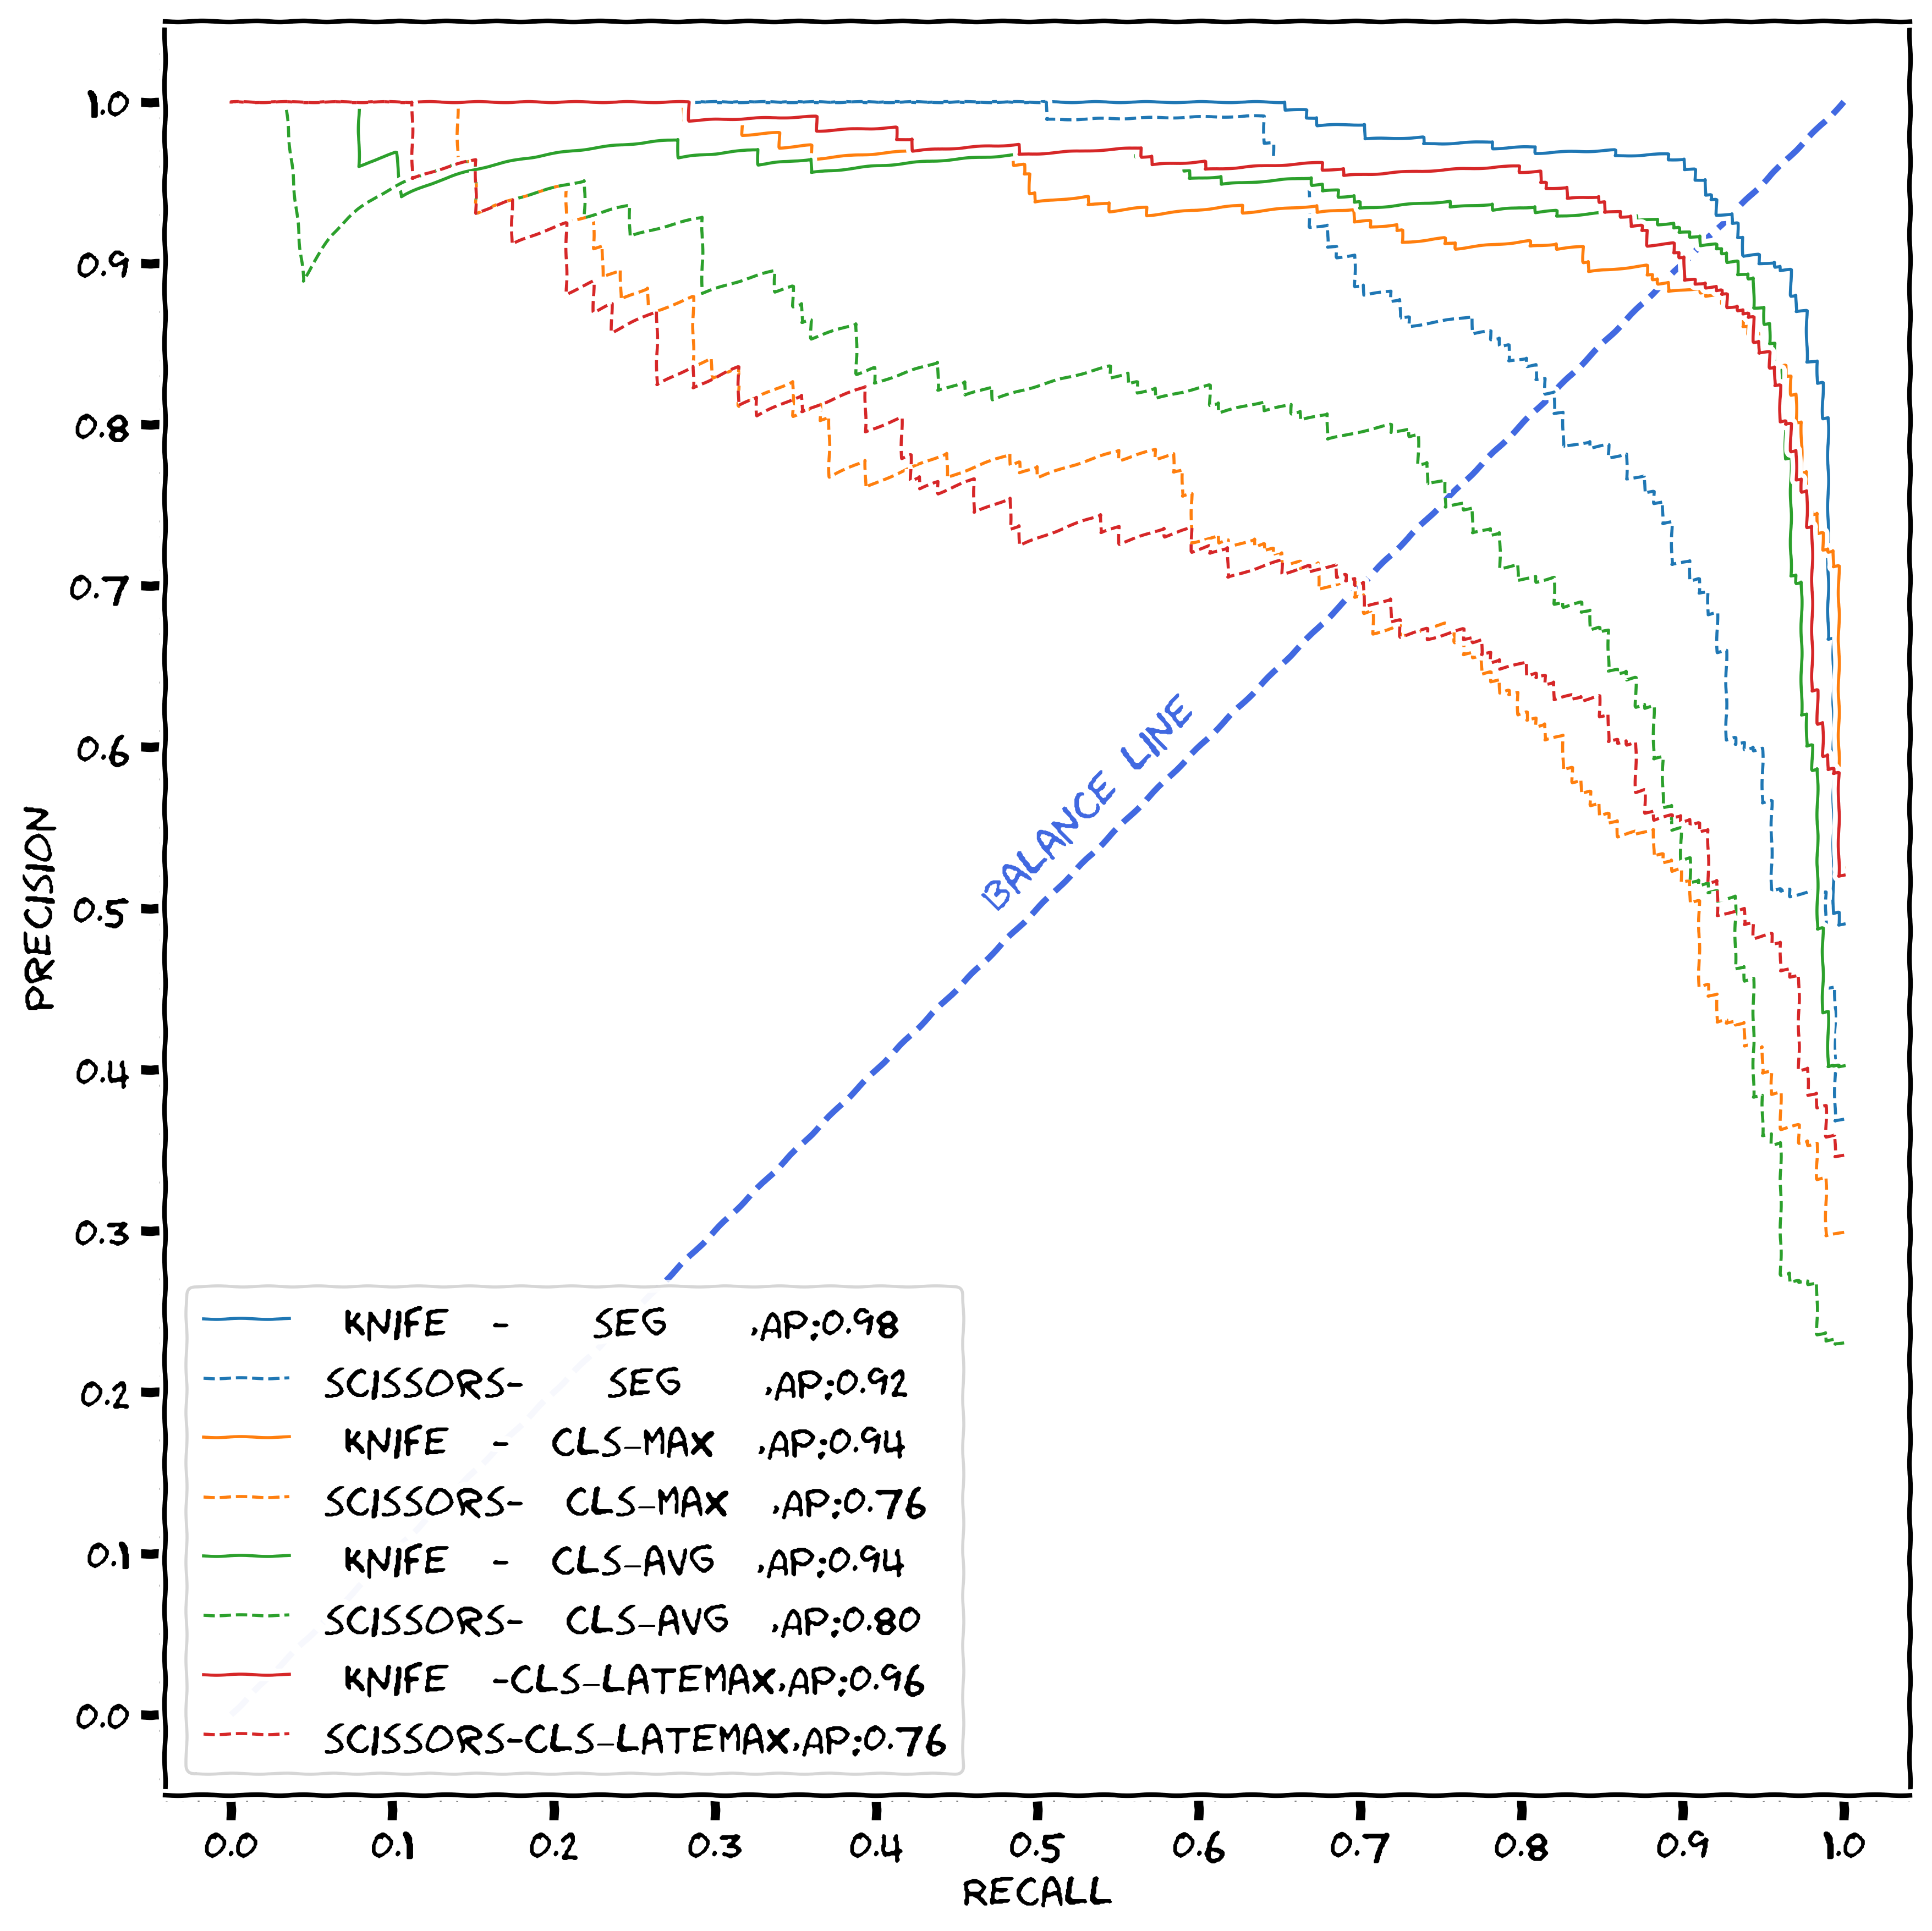

In [374]:
dataset_name = 'ks1'
dataset_type = 'val'
# model_name = 'seg'  # 'cls_latemax'
cat_name = ['knife', 'scissors']
# cat_id = [0, 1]
cat_id = [0, 1]
color_per_model = {
    'seg':'C0', 
    'cls_max':'C1', 
    'cls_avg':'C2', 
    'cls_latemax':'C3'
}
style_per_cat = ['-', '--']

precision = dict()
recall = dict()
thres = dict()
average_precision = dict()

with plt.xkcd():
    fig = plt.figure(11, figsize=(9, 9), dpi=400)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.01])
    plt.xlim([0.0, 1.01])
    plt.minorticks_on()

    fig.axes[0].xaxis.set_major_locator(MultipleLocator(0.1))
    fig.axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
    fig.axes[0].xaxis.set_minor_locator(MultipleLocator(0.01))
    fig.axes[0].yaxis.set_minor_locator(MultipleLocator(0.01))
    fig.axes[0].axis('equal')

    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    plt.plot(np.arange(0.0, 1.01, 0.01), 
             np.arange(0.0, 1.01, 0.01), 
             color='royalblue', 
             linestyle='--')
    plt.annotate("balance line", xy=(0.5, 0.5), color='royalblue', 
                 rotation=45, xytext=(-20, 0), textcoords='offset points')

    for model_name in color_per_model:
        target_folder = os.path.join('res_pkls', dataset_name, model_name)
        label_fn = os.path.join(target_folder, f'label_{dataset_type}.pkl')
        score_fn = os.path.join(target_folder, f'score_{dataset_type}.pkl')

        with open(label_fn, 'rb') as l_f:
            label_list = pickle.load(l_f)
            if 'val' in label_fn:
                label_list[116, 1] = 1
        with open(score_fn, 'rb') as s_f:
            score_list = pickle.load(s_f)
            if 'ks1' in label_fn and 'test' in label_fn:
                score_list[650, i] = 0
        for i in cat_id:
            precision[i], recall[i], thres[i] = precision_recall_curve(
                label_list[:, i], score_list[:, i])
            ap = average_precision_score(label_list[:, i], score_list[:, i])
            line_kwargs = {'label': f"{cat_name[i]:^8}-{model_name:^11},AP:{ap:.2f}", 
                           'color': color_per_model[model_name], 
                           'linestyle': style_per_cat[i], 
                           'linewidth': 1,}
            plt.plot(recall[i], precision[i], **line_kwargs)   
#             plt.legend(loc='lower left', prop={'family':'monospace'})
            plt.legend(loc='lower left')
            plt.tight_layout()
    plt.show()

    
    

In [369]:
for i in range(2):
    print(len(label_list[:, i]), sum(label_list[:, i]))

410 303
410 178


In [355]:
la, sc = label_list[:, i], score_list[:, i]
sc[la == 1] = -1

ind = np.argpartition(sc, -15)[-15:]
print(ind)
print(sc[ind])


[249 251 125 317  74  56 402 327 191 335  17 138 111 129  25]
[0.8672946  0.8842312  0.8851839  0.9932568  0.9995783  0.97644424
 0.92267054 0.938584   0.940039   0.9496899  0.97798127 0.9686073
 0.9533476  0.9505046  0.9541045 ]


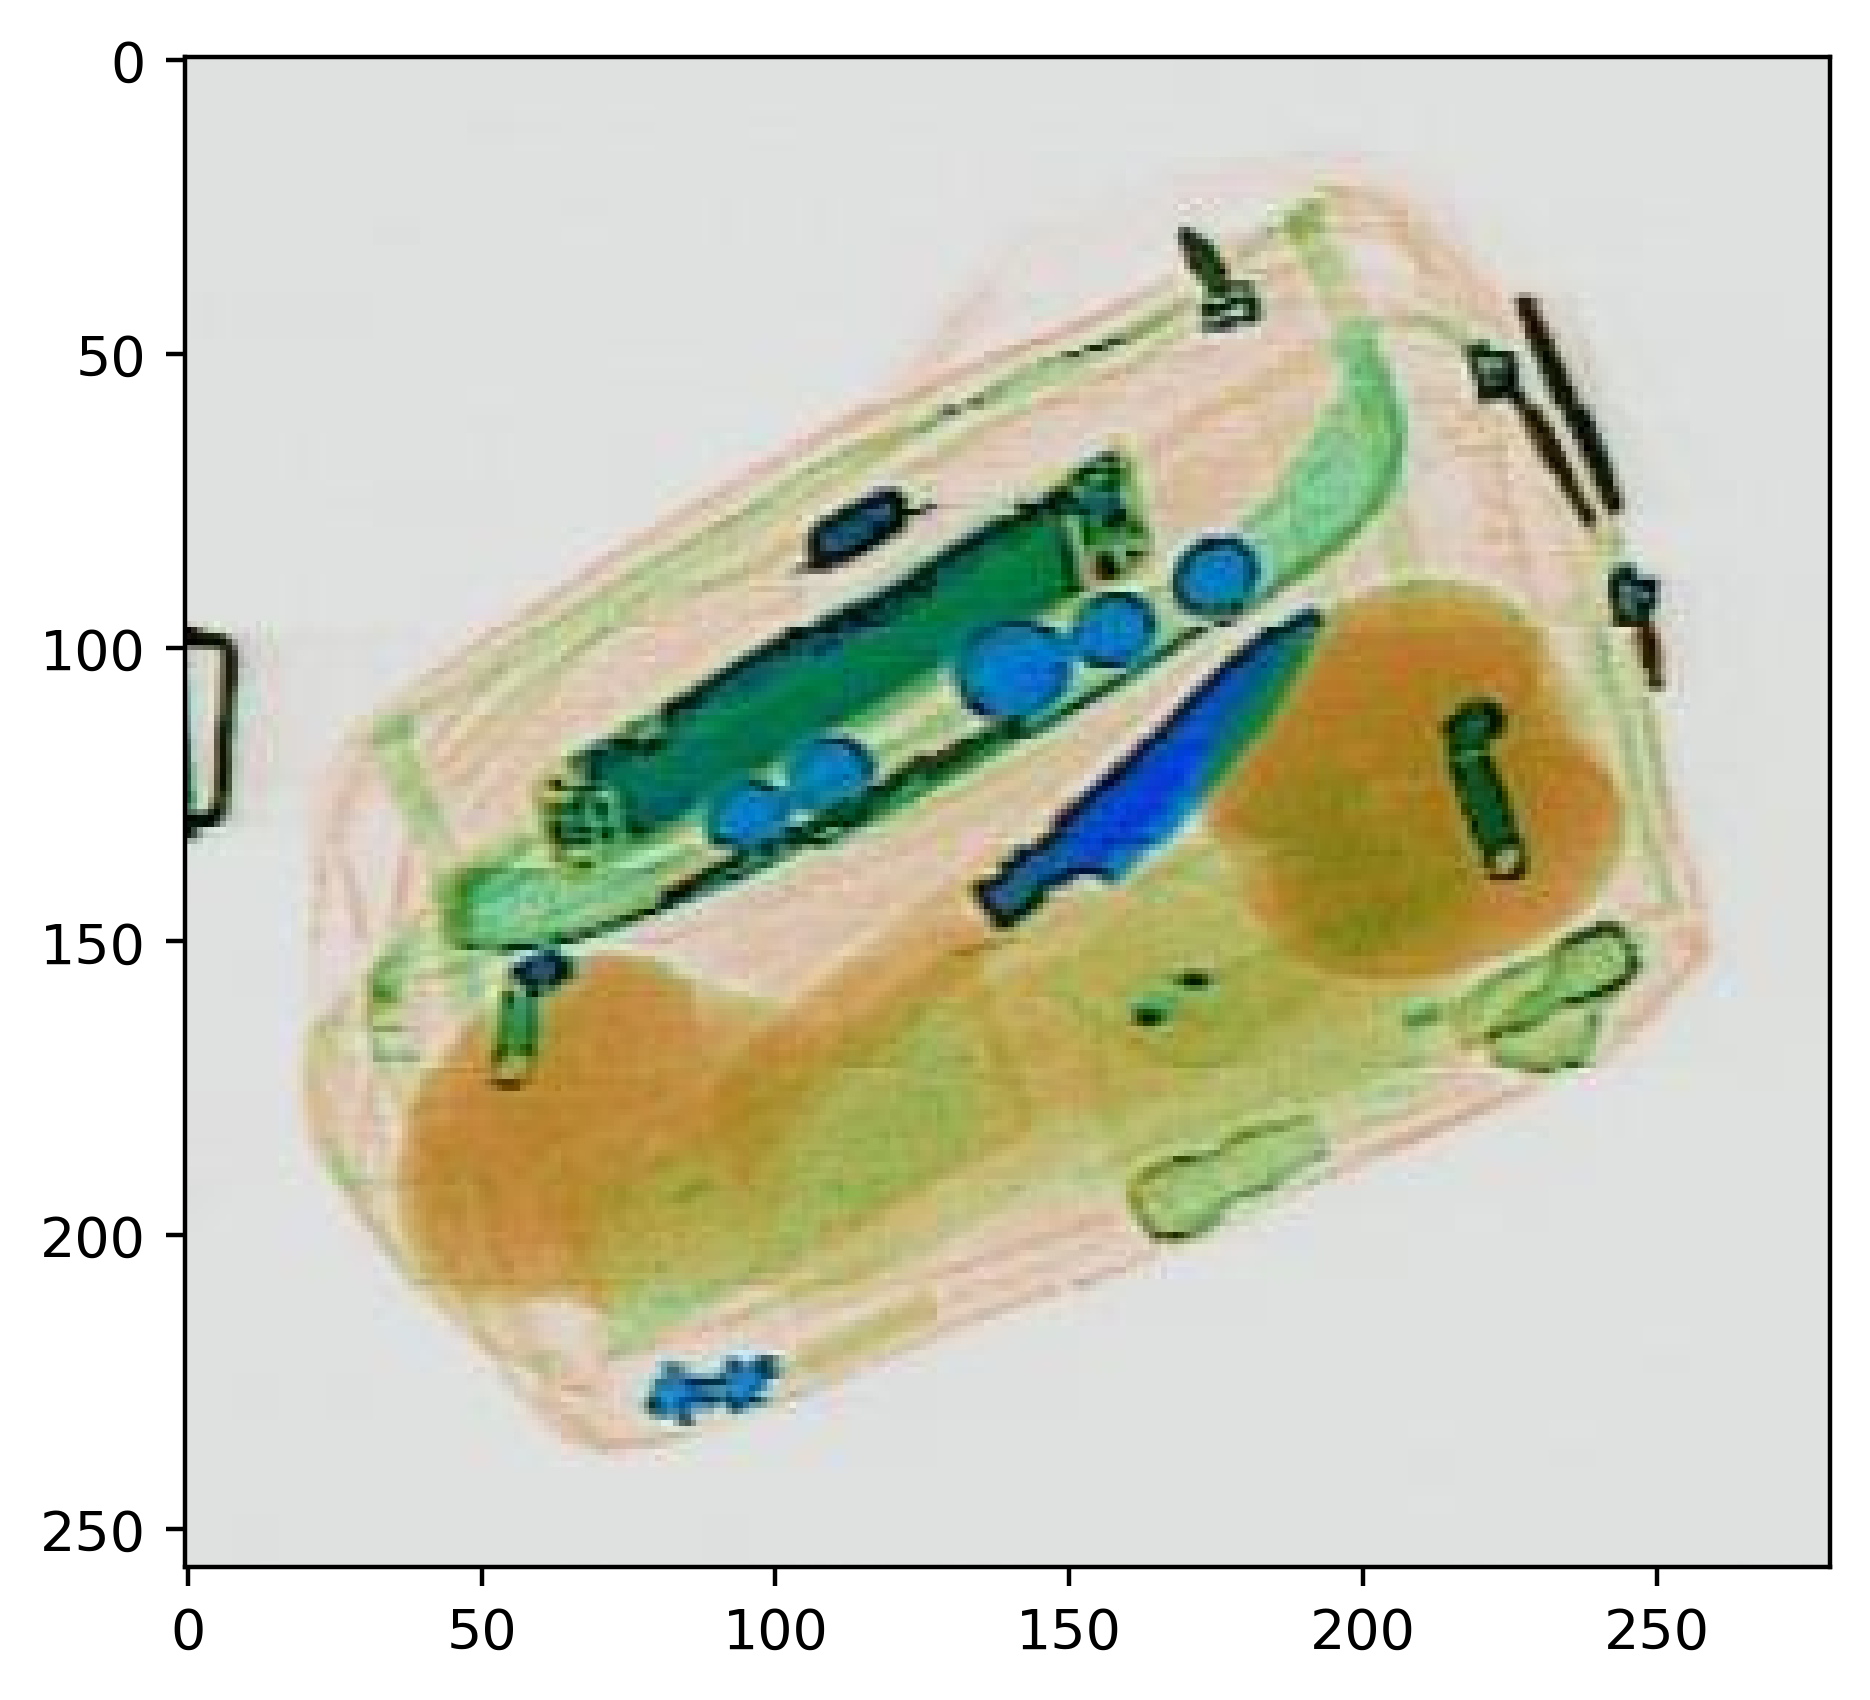

In [356]:
anno_file = '/DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_test.json'
ana_coco = COCO(anno_file)
keys = list(ana_coco.imgs.keys())

to_show = {74}#116

for idx, (img_id, img_info) in enumerate(ana_coco.imgs.items()):
    if idx not in to_show:
        continue
    image = cv2.imread(img_info['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         img = ana_coco.loadImgs([keys[idxx]])[0]
#     I = io.imread(img['file_name'])
    plt.figure(figsize=(10, 5), dpi=400)
    plt.imshow(image)
    plt.show()

In [2]:
# checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/xray_seg_ks0_lr004_150E/best_mIoU.pth'
# checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/overfit_1153/best_mIoU.pth'
# checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/xray_cls_ks0_150E_1153/best_first_run.pth'
# checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/cls_1345_averagepool_db/best_accuracy.pth'

checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/seg_1345_ks0/best_mIoU.pth'
nclasses = 2
ignore_label = 255
image_pad_value = (255, 255, 255)
size_h = 1153
size_w = 1345
dataset_type = 'XrayDataset'
dataset_root = ''
norm_cfg = dict(type='BN')
multi_label = True

img_norm_cfg = dict(mean=(0.485, 0.456, 0.406),
                    std=(0.229, 0.224, 0.225),
                    max_pixel_value=255.0)
inference_cfg = dict(
    gpu_id='9',
    multi_label=multi_label,
    transforms=[
        dict(type='LongestMaxSize',
             h_max=size_h,
             w_max=size_w,
             interpolation=cv2.INTER_LINEAR),
        dict(type='PadIfNeeded',
             min_height=size_h,
             min_width=size_w,
             value=image_pad_value,
             mask_value=ignore_label),
        dict(type='Normalize', **img_norm_cfg),
        dict(type='ToTensor'),
    ],
    model=dict(
        # model/encoder
        encoder=dict(
            backbone=dict(
                type='ResNet',
                arch='resnet50',
                replace_stride_with_dilation=[False, False, True],
                multi_grid=[1, 2, 4],
                norm_cfg=norm_cfg,
            ),
            enhance=dict(
                type='ASPP',
                from_layer='c5',
                to_layer='enhance',
                in_channels=2048,
                out_channels=256,
                atrous_rates=[6, 12, 18],
                mode='bilinear',
                align_corners=True,
                norm_cfg=norm_cfg,
                dropout=0.1,
            ),
        ),
        # model/decoder
        decoder=dict(
            type='GFPN',
            # model/decoder/blocks
            neck=[
                # model/decoder/blocks/block1
                dict(
                    type='JunctionBlock',
                    fusion_method='concat',
                    top_down=dict(
                        from_layer='enhance',
                        upsample=dict(
                            type='Upsample',
                            scale_factor=4,
                            scale_bias=-3,
                            mode='bilinear',
                            align_corners=True,
                        ),
                    ),
                    lateral=dict(
                        from_layer='c2',
                        type='ConvModule',
                        in_channels=256,
                        out_channels=48,
                        kernel_size=1,
                        norm_cfg=norm_cfg,
                        act_cfg=dict(type='Relu', inplace=True),
                    ),
                    post=None,
                    to_layer='p5',
                ),  # 4
            ],
        ),
        # model/head
        head=dict(
            type='Head',
            in_channels=304,
            inter_channels=256,
            out_channels=nclasses,
            norm_cfg=norm_cfg,
            num_convs=2,
            global_pool_cfg=dict(
                type='AdaptiveAvgPool2d',
                output_size=(1, 1),
            ),
#             norm_cfg=norm_cfg,
#             num_convs=2,
#             upsample=dict(
#                 type='Upsample',
#                 size=(size_h, size_w),
#                 mode='bilinear',
#                 align_corners=True,
#             ),
        )))
common_cfg = dict(seed=0,
              logger=dict(handlers=(
                  dict(type='StreamHandler', level='INFO'),
                  dict(type='FileHandler', level='INFO'),
              ), ),
              cudnn_deterministic=False,
              cudnn_benchmark=True,
              metrics=[
                  dict(type='MultiLabelIoU', num_classes=nclasses),
                  dict(type='MultiLabelMIoU', num_classes=nclasses),
              ],
              dist_params=dict(backend='nccl'))
transform_cfg = [
                dict(type='LongestMaxSize', h_max=size_h, w_max=size_w,
                     interpolation=cv2.INTER_LINEAR),
                dict(type='PadIfNeeded', min_height=size_h, min_width=size_w,
                     value=image_pad_value, mask_value=0),
#                 dict(type='FactorScale', scale=1/16,
#                      interpolation=cv2.INTER_LINEAR,
#                      always_apply=True,
#                      p=1.0),
                # dict(type='GaussianBlur', blur_limit=7, p=0.5),
                dict(type='Normalize', **img_norm_cfg),
                dict(type='ToTensor'),
            ]
dataset_cfg=dict(
    type=dataset_type,
    root=dataset_root,
    ann_file='/DATA/home/tianhewang/DataSets/'
                         'KS_X-ray/ks_0/ks_0_train.json',
    img_prefix='',
    multi_label=multi_label)

transform = build_transform(transform_cfg)
dataset = build_dataset(dataset_cfg, dict(transform=transform))

runner = InferenceRunner(inference_cfg, common_cfg)
runner.load_checkpoint(checkpoint)


2020-10-26 19:25:27,527 - INFO - Set cudnn deterministic False
2020-10-26 19:25:27,528 - INFO - Set cudnn benchmark True
2020-10-26 19:25:27,529 - INFO - Build model
2020-10-26 19:25:28,012 - INFO - ResNet init weights from pretreain
2020-10-26 19:25:28,549 - INFO - ASPP init weights
2020-10-26 19:25:28,731 - INFO - GFPN init weights
2020-10-26 19:25:28,740 - INFO - Head siwtched to classification mode
2020-10-26 19:25:28,741 - INFO - Head init weights
2020-10-26 19:25:35,455 - INFO - Load checkpoint from /DATA/home/tianhewang/work_spaces/project_x-ray/cls_1345_averagepool_db/best_accuracy.pth


{'meta': {'best': OrderedDict([('accuracy', 0.8860294117647058)]),
  'epoch': 113,
  'iter': 92660,
  'lr': array([0.01134905]),
  'time': 'Thu Oct 22 22:51:29 2020'},
 'state_dict': OrderedDict([('0.0.conv1.weight',
               tensor([[[[ 4.2463e-03,  6.9698e-02,  6.7331e-02,  ...,  9.1299e-02,
                           9.1133e-02,  8.8854e-02],
                         [-2.2614e-02,  4.3217e-02,  4.5056e-02,  ...,  7.0432e-02,
                           6.8208e-02,  6.5823e-02],
                         [-2.6977e-02,  3.8813e-02,  3.9689e-02,  ...,  7.5837e-02,
                           7.2731e-02,  7.1248e-02],
                         ...,
                         [-3.3580e-02,  3.4697e-02,  3.1735e-02,  ...,  4.8538e-02,
                           5.3362e-02,  6.0612e-02],
                         [-3.3327e-02,  3.5978e-02,  3.6854e-02,  ...,  5.9924e-02,
                           5.5093e-02,  5.6192e-02],
                         [-4.1750e-02,  2.7086e-02,  2.7109e-02,  ..

In [77]:
%ls configs


cls_1345_averagepool_db.py         seg_1345_ks0.py
cls_1345_ks0_latemaxpool_db.py     seg_1345_ks0_sklearn.py
cls_1345_ks1_averagepool_local.py  seg_1345_ks1_local_cnt.py
cls_1345_ks1_latemaxpool_db.py     seg_1345_ks1_local.py
cls_1345_ks1_maxpool_db.py         xray_cls_ks0_150E_1153.py
cls_1345_maxpool_local.py          xray_seg_ks0_lr003_150E_1153.py
default/                           xray_seg_ks0_lr003_150E.py
past_exps/                         xray_seg_ks0_lr003.py
__pycache__/                       xray_seg_ks0_lr004_1153.py
seg_1153_ks0_batch4.py             xray_seg_ks0_lr004_1345.py
seg_1153_ks0.py                    xray_seg_ks0_lr004_150E.py
seg_1345_ks0_half_db.py            xray_seg_ks0.py


In [2]:
g_id = 4
cfg = Config.fromfile('configs/seg_1345_ks0.py')
checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/seg_1345_ks0/epoch_135.pth'
inference_cfg = cfg['inference']
inference_cfg['gpu_id'] = f'{g_id}'
common_cfg = cfg['common']

anno_files = [cfg['train']['data']['val']['dataset']['ann_file'],
              cfg['test']['data']['dataset']['ann_file']]

runner = InferenceRunner(inference_cfg, common_cfg)
runner.load_checkpoint(checkpoint)

2020-11-06 11:54:37,530 - INFO - Set cudnn deterministic False
2020-11-06 11:54:37,532 - INFO - Set cudnn benchmark True
2020-11-06 11:54:37,534 - INFO - Build model
2020-11-06 11:54:37,980 - INFO - ResNet init weights from pretreain
2020-11-06 11:54:38,425 - INFO - ASPP init weights
2020-11-06 11:54:38,584 - INFO - GFPN init weights
2020-11-06 11:54:38,594 - INFO - Head init weights
2020-11-06 11:54:50,599 - INFO - Load checkpoint from /DATA/home/tianhewang/work_spaces/project_x-ray/seg_1345_ks0/epoch_135.pth


{'meta': {'best': OrderedDict([('mIoU', 0.6418562497615542)]),
  'epoch': 135,
  'iter': 110700,
  'lr': array([0.0050357]),
  'time': 'Fri Oct 23 22:44:45 2020'},
 'state_dict': OrderedDict([('0.0.conv1.weight',
               tensor([[[[-2.0906e-03,  4.1678e-03,  2.3846e-03,  ...,  2.3665e-03,
                           1.0532e-03, -3.4864e-03],
                         [-1.2760e-03,  5.5614e-03,  7.6318e-03,  ...,  9.4529e-03,
                           5.6236e-03,  2.1638e-05],
                         [-1.8522e-03,  3.4991e-03,  2.4140e-03,  ...,  1.0586e-02,
                           6.1181e-03,  1.9702e-03],
                         ...,
                         [-9.5747e-03, -3.6020e-03, -1.0017e-02,  ..., -2.2863e-02,
                          -1.7484e-02, -7.8038e-03],
                         [-7.3856e-03,  2.5208e-03,  3.7491e-03,  ...,  2.9744e-04,
                          -4.5799e-03, -2.8564e-03],
                         [-1.3014e-02, -2.3804e-03, -6.6266e-06,  ...,  

In [59]:
g_id = 4
cfg = Config.fromfile('configs/seg_1345_ks0.py')
checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/seg_1345_ks0/epoch_135.pth'
inference_cfg = cfg['inference']
inference_cfg['gpu_id'] = f'{g_id}'
common_cfg = cfg['common']
anno_files = [cfg['train']['data']['val']['dataset']['ann_file'],
              cfg['test']['data']['dataset']['ann_file']]

ana_coco = COCO(anno_files[1])
runner.getmap = True

base_dir = '/DATA/home/tianhewang/DataSets/KS_X-ray/visualize/KS0_seg_test'

bad_cases = {'6812', '6957', '7038', '7186', '7191', '7253', '7341', '3012'}

for idx, (img_id, img_info) in enumerate(tqdm(ana_coco.imgs.items(), dynamic_ncols=True,
                                              unit='images', unit_scale=True)):
    fn = os.path.split(img_info['file_name'])[-1]
    fn, _ = os.path.splitext(fn)
    for case in bad_cases:
        if case in fn:
            print(img_id)

100%|██████████| 411/411 [00:00<00:00, 141kimages/s]

6812_sixray
7186_sixray
7191_sixray
7038_sixray
6957_sixray
7341_sixray
7253_sixray


659 414 3
330 414 3


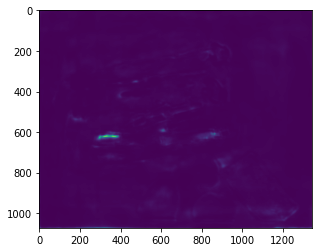

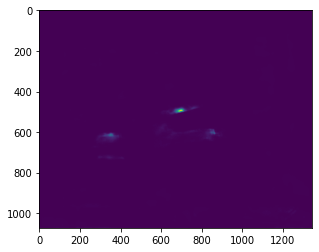

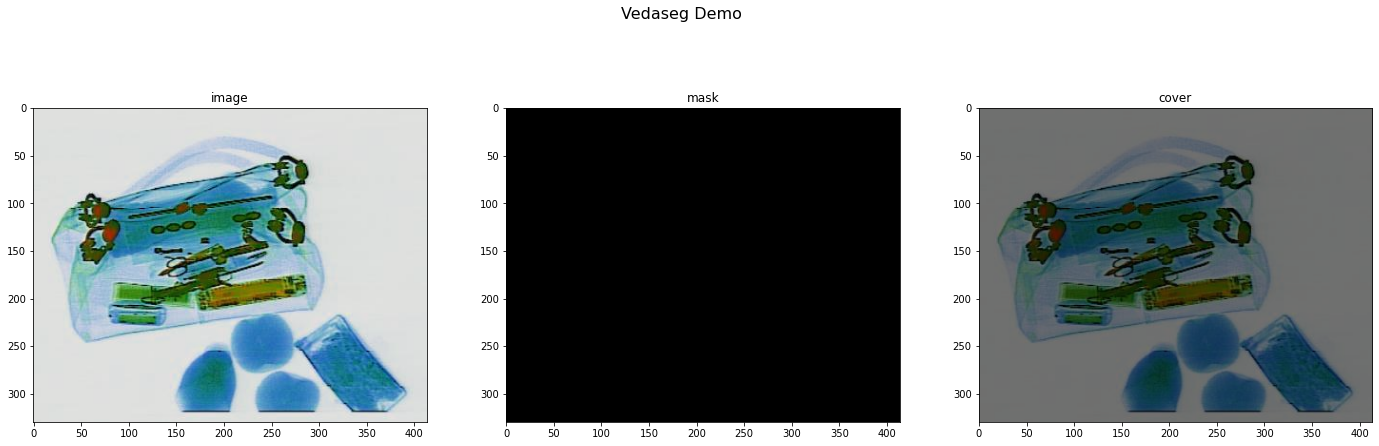

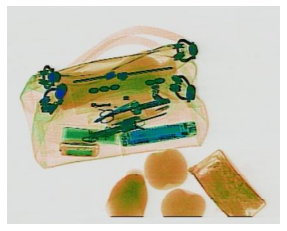

In [134]:
img_id = '7253_sixray'
img_info = ana_coco.imgs[img_id]



image = cv2.imread(img_info['file_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape
print(h, w, c)


image = image[h // 2:, :, :]
h, w, c = image.shape
print(h, w, c)

dummy_mask = np.zeros((h, w))
output = runner(image, [dummy_mask])

output = output.transpose((1, 2, 0))
resized_shape = cal_resized_shape(output, image.shape[:2])
output = inverse_pad(output, resized_shape)

plt.figure()
plt.imshow(output[:, :, 1])
# plt.axis('off')
plt.show()
# plt.savefig(os.path.join(image_folder, 'scissor_conf_map.png'))
# plt.close('all')

plt.figure()
plt.imshow(output[:, :, 0])
# plt.axis('off')
plt.show()
# plt.savefig(os.path.join(image_folder, 'knife_conf_map.png'))
# plt.close('all')

output = np.where(output >= 0.5, 1, 0)
output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_NEAREST)#interpo=cv2.INTER_LINEAR)

#     print(max(output.reshape(-1)), '##')
#     print(True in (output >= 0.01))

result(image, output, classes=('knife', 'scissors'),
       palette=[(0, 0, 255), (0, 255, 0)], show=True, out=None)
# result(img_info['file_name'], output, classes=('knife', 'scissors'),
#        palette=[(0, 0, 255), (0, 255, 0)], show=True, out=None)
# result(img_info['file_name'], output, classes=('knife', 'scissors'),
#        palette=[(0, 0, 255), (0, 255, 0)], show=False, out=image_folder)

gt_label = [0, 0]
ann_ids = ana_coco.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = ana_coco.loadAnns(ann_ids)
#     print(anns)
for ann in anns:
    gt_label[ann['category_id'] - 1] = 1
#     if gt_label[1] == 0:
#         continue
#     print(img_info['file_name'])
#     print(gt_label)
#     print(np.array(get_label_score(output)))
#     print(idx)

plt.figure()
plt.imshow(image)
plt.axis('off')
ana_coco.showAnns(anns, draw_bbox=False)
plt.show()
# plt.savefig(os.path.join(image_folder, 'gt.png'))
# plt.close('all')

568 966 3


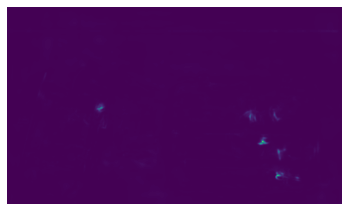

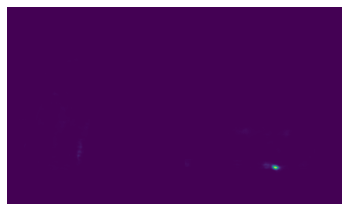

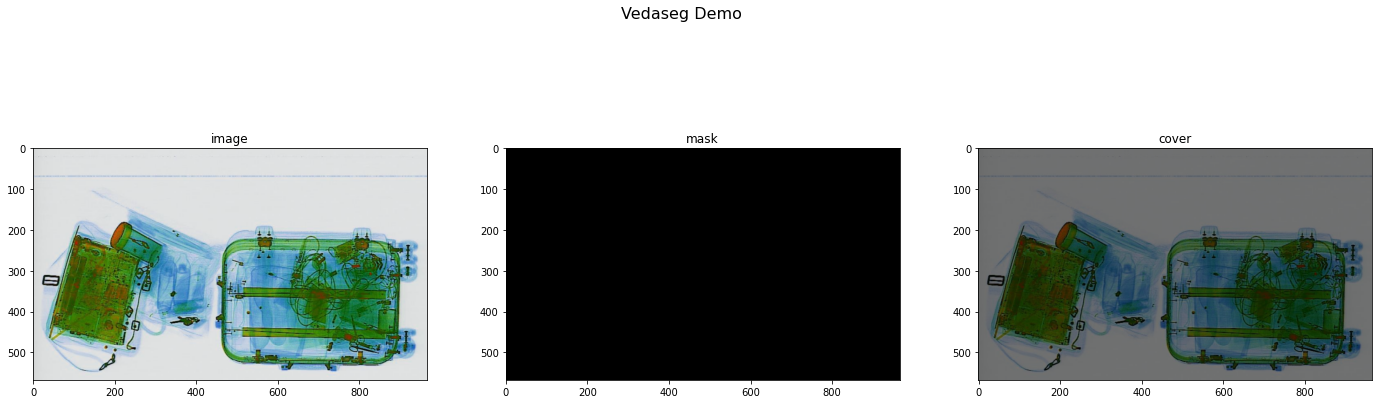

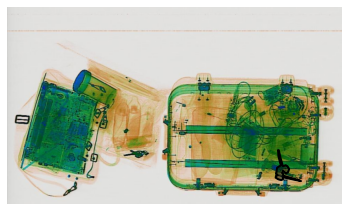

In [25]:
img_id = '6812_sixray'
img_info = ana_coco.imgs[img_id]



image = cv2.imread(img_info['file_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape
print(h, w, c)


# image = image[h//2:, w//2:, :]
# h, w, c = image.shape
# print(h, w, c)

dummy_mask = np.zeros((h, w))
output = runner(image, [dummy_mask])

output = output.transpose((1, 2, 0))
resized_shape = cal_resized_shape(output, image.shape[:2])
output = inverse_pad(output, resized_shape)

plt.figure()
plt.imshow(output[:, :, 1])
plt.axis('off')
plt.show()
# plt.savefig(os.path.join(image_folder, 'scissor_conf_map.png'))
# plt.close('all')

plt.figure()
plt.imshow(output[:, :, 0])
plt.axis('off')
plt.show()
# plt.savefig(os.path.join(image_folder, 'knife_conf_map.png'))
# plt.close('all')

output = np.where(output >= 0.5, 1, 0)
output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_NEAREST)#interpo=cv2.INTER_LINEAR)

#     print(max(output.reshape(-1)), '##')
#     print(True in (output >= 0.01))

result(image, output, classes=('knife', 'scissors'),
       palette=[(0, 0, 255), (0, 255, 0)], show=True, out=None)
# result(img_info['file_name'], output, classes=('knife', 'scissors'),
#        palette=[(0, 0, 255), (0, 255, 0)], show=True, out=None)
# result(img_info['file_name'], output, classes=('knife', 'scissors'),
#        palette=[(0, 0, 255), (0, 255, 0)], show=False, out=image_folder)

gt_label = [0, 0]
ann_ids = ana_coco.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = ana_coco.loadAnns(ann_ids)
#     print(anns)
for ann in anns:
    gt_label[ann['category_id'] - 1] = 1
#     if gt_label[1] == 0:
#         continue
#     print(img_info['file_name'])
#     print(gt_label)
#     print(np.array(get_label_score(output)))
#     print(idx)

plt.figure()
plt.imshow(image)
plt.axis('off')
ana_coco.showAnns(anns, draw_bbox=False)
plt.show()
# plt.savefig(os.path.join(image_folder, 'gt.png'))
# plt.close('all')

In [ ]:
ana_coco = COCO(anno_files[1])
runner.getmap = True

base_dir = '/DATA/home/tianhewang/DataSets/KS_X-ray/visualize/KS0_seg_test'

for idx, (img_id, img_info) in enumerate(tqdm(ana_coco.imgs.items(), dynamic_ncols=True,
                                              unit='images', unit_scale=True)):
        
    fn = os.path.split(img_info['file_name'])[-1]
    fn, _ = os.path.splitext(fn)
    image_folder = os.path.join(base_dir, fn)
    os.makedirs(image_folder, exist_ok=True)
        
    image = cv2.imread(img_info['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    dummy_mask = np.zeros((h, w))
    output = runner(image, [dummy_mask])

    output = output.transpose((1, 2, 0))
    resized_shape = cal_resized_shape(output, image.shape[:2])
    output = inverse_pad(output, resized_shape)

    plt.figure(figsize=(20,10))
    plt.imshow(output[:, :, 1])
    plt.axis('off')
    plt.savefig(os.path.join(image_folder, 'scissor_conf_map.png'))
    plt.close('all')
    
    plt.figure(figsize=(20,10))
    plt.imshow(output[:, :, 0])
    plt.axis('off')
    plt.savefig(os.path.join(image_folder, 'knife_conf_map.png'))
    plt.close('all')
    
    output = np.where(output >= 0.5, 1, 0)
    output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_NEAREST)#interpo=cv2.INTER_LINEAR)

#     print(max(output.reshape(-1)), '##')
#     print(True in (output >= 0.01))
    
    result(img_info['file_name'], output, classes=('knife', 'scissors'),
           palette=[(0, 0, 255), (0, 255, 0)], show=False, out=image_folder)
    
    gt_label = [0, 0]
    ann_ids = ana_coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = ana_coco.loadAnns(ann_ids)
#     print(anns)
    for ann in anns:
        gt_label[ann['category_id'] - 1] = 1
#     if gt_label[1] == 0:
#         continue
#     print(img_info['file_name'])
#     print(gt_label)
#     print(np.array(get_label_score(output)))
#     print(idx)
    
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.axis('off')
    ana_coco.showAnns(anns, draw_bbox=False)
    plt.savefig(os.path.join(image_folder, 'gt.png'))
    plt.close('all')


100%|█████████▉| 410/411 [07:00<00:01, 1.16s/images] 

In [133]:
def inverse_resize(pred, image_shape, interpo=cv2.INTER_NEAREST):
    pred = cv2.resize(pred.astype('uint8'), (image_shape[1], image_shape[0]),
                      interpolation=interpo)
    return pred


def cal_resized_shape(pred, image_shape):
    h, w = image_shape
    size_h, size_w = pred.shape[0], pred.shape[1]
    scale_factor = min(size_h / h, size_w / w)
    resized_h, resized_w = int(h * scale_factor), int(w * scale_factor)
    return resized_h, resized_w


def inverse_pad(pred, image_shape):
    h, w = image_shape
    return pred[:h, :w]


def plot_result(img, mask, cover):
    fig, ax = plt.subplots(1, 3, figsize=(24, 8))
    fig.suptitle("Vedaseg Demo", y=0.95, fontsize=16)

    ax[0].set_title('image')
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    ax[1].set_title(f'mask')
    ax[1].imshow(mask)

    ax[2].set_title(f'cover')
    ax[2].imshow(cv2.cvtColor(cover, cv2.COLOR_BGR2RGB))
    plt.show()
    
def get_label_score(mask):
    res = [0, 0]
    for l in range(2):
        mask_l = mask[..., l].reshape(-1)
        max_val = max(mask_l)
        res[l] = max_val
    return res


def result(fname,
           pred_mask,
           classes,
           multi_label=True,
           palette=None,
           show=False,
           anns=None,
           out=None):
    if palette is None:
        palette = np.random.randint(0, 255, size=(len(classes), 3))
    else:
        palette = np.array(palette)
        
    if isinstance(fname, str):
        img_ori = cv2.imread(fname)
        print(f'read from {fname}')
    else:
        img_ori = fname
        
    mask = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3),
                    dtype=np.uint8)
    for label, color in enumerate(palette):
        if multi_label:
            mask[pred_mask[:, :, label] == 1] = color
        else:
            mask[pred_mask == label, :] = color

        img_ori = cv2.resize(img_ori, (pred_mask.shape[1], pred_mask.shape[0]),
                             interpolation=cv2.INTER_NEAREST)

    cover = img_ori * 0.5 + mask * 0.5
    cover = cover.astype(np.uint8)

    if out is not None:
        cv2.imwrite(os.path.join(out, 'img.png'), img_ori)
        cv2.imwrite(os.path.join(out, 'mask.png'), mask)
        cv2.imwrite(os.path.join(out, 'cover.png'), cover)
#         _, fullname = os.path.split(fname)
#         fname, _ = os.path.splitext(fullname)
#         save_dir = os.path.join(out, fname)
#         os.makedirs(save_dir, exist_ok=True)
#         cv2.imwrite(os.path.join(save_dir, 'img.png'), img_ori)
#         cv2.imwrite(os.path.join(save_dir, 'mask.png'), mask)
#         cv2.imwrite(os.path.join(save_dir, 'cover.png'), cover)
        if multi_label:
            for i in range(pred_mask.shape[-1]):
                cv2.imwrite(os.path.join(out, classes[i] + '.png'),
                            pred_mask[:, :, i] * 255)

    if show:
        plot_result(img_ori, mask, cover)

In [46]:
from vedaseg.models.heads import Head, XHead

norm_cfg = dict(type='BN')
nclasses = 2
size_h = 1153
size_w = 1345

# orig = Head(in_channels=304,
#             inter_channels=256,
#             out_channels=2,
#             norm_cfg=norm_cfg,
#             num_convs=2,
#             global_pool_cfg=dict(type='AdaptiveAvgPool2d',
#                                  output_size=(1, 1),))

# new = XHead(in_channels=304,
#             inter_channels=256,
#             out_channels=2,
#             norm_cfg=norm_cfg,
#             num_convs=2,
#             with_seg=False,
#             global_pool_cfg=dict(type='AdaptiveAvgPool2d',
#                                  output_size=(1, 1),))
# orig = Head(in_channels=304,
#             inter_channels=256,
#             out_channels=nclasses,
#             norm_cfg=norm_cfg,
#             num_convs=2,
#             upsample=dict(type='Upsample',
#                           size=(size_h, size_w),
#                           mode='bilinear',
#                           align_corners=True,
#                          ))

new = XHead(in_channels=304,
            inter_channels=256,
            out_channels=nclasses,
            norm_cfg=norm_cfg,
            num_convs=2,
            global_pool_cfg=dict(type='AdaptiveAvgPool2d',
                                 output_size=(1, 1),), 
            upsample=dict(type='Upsample',
                          size=(size_h, size_w),
                          mode='bilinear',
                          align_corners=True,
                         ))

# print(orig.modules)
print(new.mode)

AttributeError: 'XHead' object has no attribute 'mode'

In [3]:
anno_file = '/DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json'
# anno_file = '/DATA/home/tianhewang/DataSets/KS_X-ray/ks_overfit/ks_overfit.json'
ana_coco = COCO(anno_file)
keys = list(ana_coco.imgs.keys())


def get_label(mask):
    mask_ = mask.astype(int)
    res = [0, 0]
    for l in range(2):
        mask_l = mask_[..., l].reshape(-1)
#         print(f"max of clas{l} -> {max(mask_l)}")
        if 1 in mask_l:
            res[l] = 1
#     mask1 = mask_[0, ...].reshape(-1)
#     mask2 = mask_[1, ...].reshape(-1)
    return res

def get_label_score(mask):
    res = [0, 0]
    for l in range(2):
        mask_l = mask[..., l].reshape(-1)
#         print(f"max of clas{l} -> {max(mask_l)}")
        max_val = max(mask_l)
        res[l] = max_val
#     mask1 = mask_[0, ...].reshape(-1)
#     mask2 = mask_[1, ...].reshape(-1)
    return res


def inverse_resize(pred, image_shape, interpo=cv2.INTER_NEAREST):
    pred = cv2.resize(pred, (image_shape[1], image_shape[0]),
                      interpolation=interpo)
    return pred


def cal_resized_shape(pred, image_shape):
    h, w = image_shape
    size_h, size_w = pred.shape[0], pred.shape[1]
    scale_factor = min(size_h / h, size_w / w)
    resized_h, resized_w = int(h * scale_factor), int(w * scale_factor)
    return resized_h, resized_w


def inverse_pad(pred, image_shape):
    h, w = image_shape
    return pred[:h, :w]

runner.getmap = True

score_list = []
label_list = []
for idxx in range(32):
    fn = ana_coco.imgs[keys[idxx]]['file_name']

    image = cv2.imread(fn)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    dummy_mask = np.zeros((h, w))
#     print(image.shape)
    output = runner(image, [dummy_mask])
#     print(output.shape)
    output = output.transpose((1, 2, 0))
#     print(output.shape)
    resized_shape = cal_resized_shape(output, image.shape[:2])
    output = inverse_pad(output, resized_shape)
    output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_LINEAR)

    img = ana_coco.loadImgs([keys[idxx]])[0]
    I = io.imread(img['file_name'])
#     plt.figure(figsize=(10, 5))
#     plt.imshow(I)
#     plt.axis('off')
    annIds = ana_coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
#     print(annIds)
    anns = ana_coco.loadAnns(annIds)
    gt_label = [0, 0]
    for ann in anns:
        gt_label[ann['category_id'] - 1] = 1
#     print(output.shape)

    label_list.append(np.array(gt_label))
    score_list.append(np.array(get_label_score(output)))
    
#     print(gt_label)
#     print(get_label_score(output))
#     ana_coco.showAnns(anns, draw_bbox=False)

#     result(fn, 
#            output, 
#            multi_label=multi_label,
#            classes=('kn', 'sc'), 
#            palette=[(0, 0, 255), (0, 255, 0)], 
#            show=True,
#            out=None)

2020-10-26 18:04:08,925 - ERROR - Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/DATA/home/tianhewang/anaconda3/envs/wider/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-4a1fa14f957b>", line 63, in <module>
    output = output.transpose((1, 2, 0))
ValueError: axes don't match array

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/DATA/home/tianhewang/anaconda3/envs/wider/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/DATA/home/tianhewang/anaconda3/envs

TypeError: object of type 'NoneType' has no len()

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(label_list[:, i],
                                                        score_list[:, i])
    average_precision[i] = average_precision_score(label_list[:, i], score_list[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(label_list.ravel(),
    score_list.ravel())
average_precision["micro"] = average_precision_score(label_list, score_list,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.94


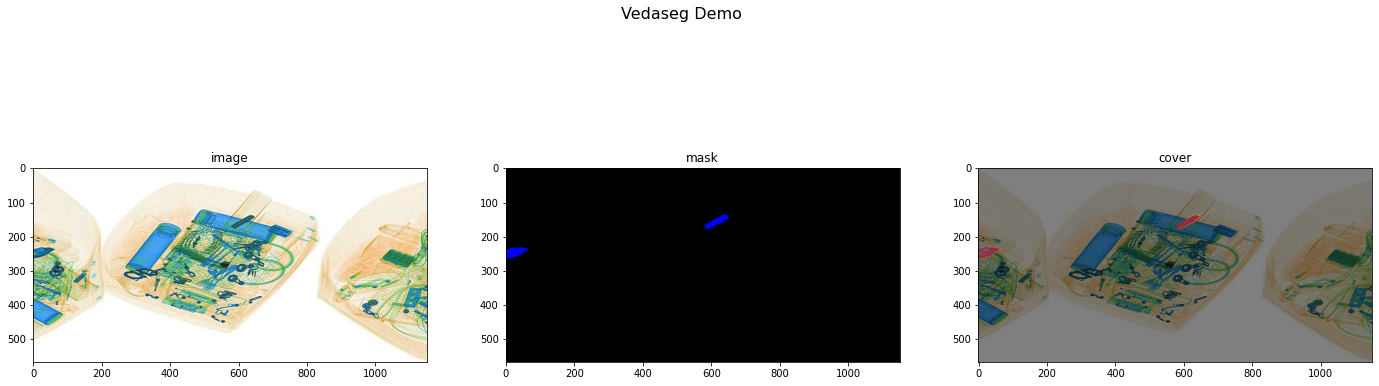

In [5]:
result(fn, 
       output, 
       multi_label=multi_label,
       classes=('kn', 'sc'), 
       palette=[(0, 0, 255), (0, 255, 0)], 
       show=True,
       out=None)

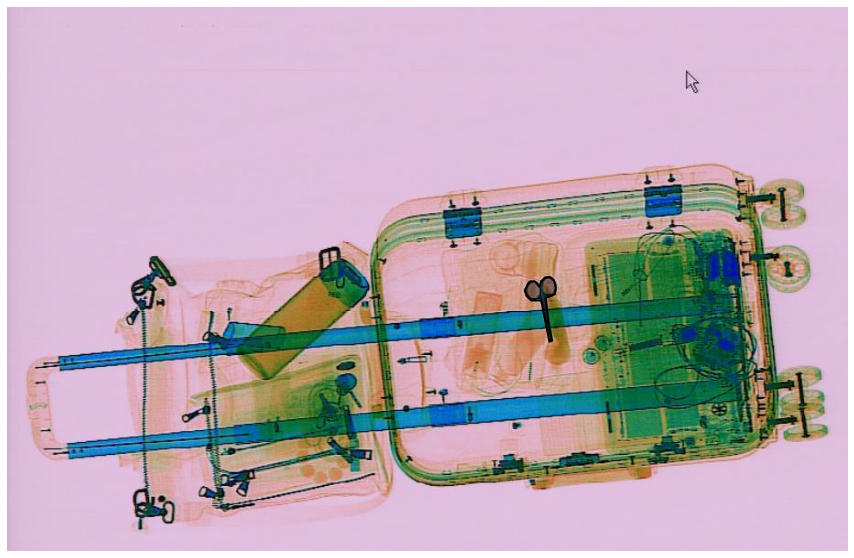

In [49]:
anno_file = '/DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json'
ana_coco = COCO(anno_file)
keys = list(ana_coco.imgs.keys())


for i in range(40):

    img = ana_coco.loadImgs([keys[i]])[0]

    I = io.imread(img['file_name'])
    plt.figure(figsize=(20,10))
    plt.imshow(I)
    plt.axis('off')
    annIds = ana_coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
    anns = ana_coco.loadAnns(annIds)
    ana_coco.showAnns(anns, draw_bbox=False)
    break
#     for ann in anns:
#         print(ann['category_id'])

In [233]:
%ls configs

cls_1345_averagepool_db.py         seg_1345_ks0_sklearn.py
cls_1345_ks0_latemaxpool_db.py     seg_1345_ks1_local_cnt.py
cls_1345_ks1_averagepool_local.py  seg_1345_ks1_local.py
cls_1345_ks1_latemaxpool_db.py     xray_cls_ks0_150E_1153.py
cls_1345_ks1_maxpool_db.py         xray_seg_ks0_lr003_150E_1153.py
cls_1345_maxpool_local.py          xray_seg_ks0_lr003_150E.py
default/                           xray_seg_ks0_lr003.py
past_exps/                         xray_seg_ks0_lr004_1153.py
__pycache__/                       xray_seg_ks0_lr004_1345.py
seg_1153_ks0_batch4.py             xray_seg_ks0_lr004_150E.py
seg_1153_ks0.py                    xray_seg_ks0.py
seg_1345_ks0.py


2020-11-06 11:44:29,532 - INFO - Set cudnn deterministic False
2020-11-06 11:44:29,533 - INFO - Set cudnn benchmark True
2020-11-06 11:44:29,534 - INFO - Build model
2020-11-06 11:44:30,040 - INFO - ResNet init weights from pretreain
2020-11-06 11:44:31,599 - INFO - ASPP init weights
2020-11-06 11:44:31,754 - INFO - GFPN init weights
2020-11-06 11:44:31,766 - INFO - Head init weights
2020-11-06 11:44:57,160 - INFO - Load checkpoint from /DATA/home/tianhewang/work_spaces/project_x-ray/from_local/seg_1345_ks1/best_mIoU.pth


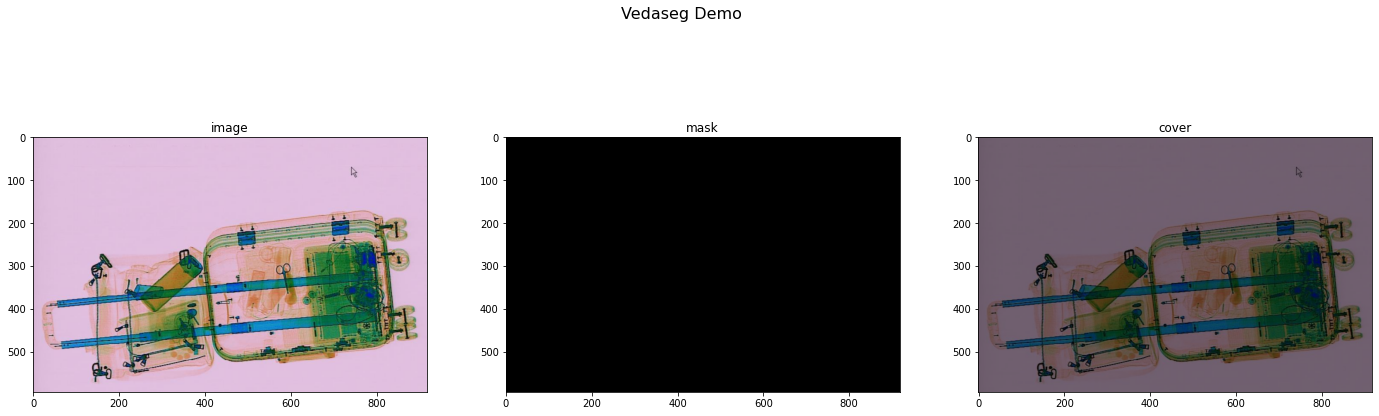

In [55]:
cfg_path = 'configs/seg_1345_ks1_local.py'
gpu_id = 4
checkpoint = '/DATA/home/tianhewang/work_spaces/project_x-ray/from_local/seg_1345_ks1/best_mIoU.pth'
image_fn = img['file_name']

cfg = Config.fromfile(cfg_path)
inference_cfg = cfg['inference']
inference_cfg['gpu_id'] = f'{gpu_id}'
common_cfg = cfg['common']

runner = InferenceRunner(inference_cfg, common_cfg)
runner.load_checkpoint(checkpoint)

image = cv2.imread(image_fn)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape
dummy_mask = np.zeros((h, w))
output = runner(image, [dummy_mask])

output = output.transpose((1, 2, 0))
resized_shape = cal_resized_shape(output, image.shape[:2])
output = inverse_pad(output, resized_shape)
output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_LINEAR)

result(image_fn, 
       output,
       classes=('kn', 'sc'), 
       palette=[(0, 0, 255), (0, 255, 0)], 
       show=True)

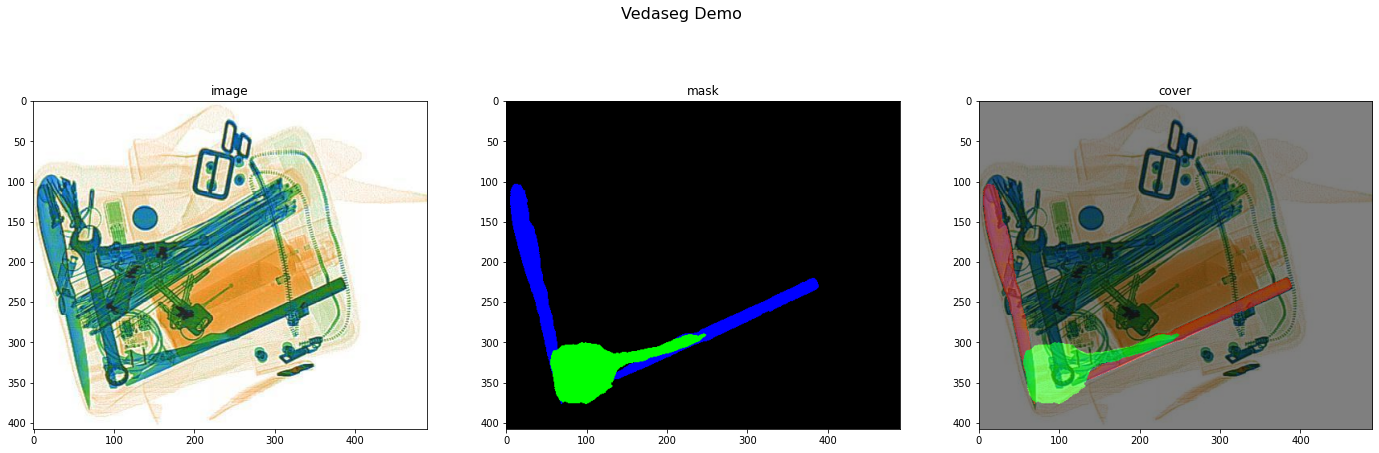

In [242]:
output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_LINEAR)

result(image_fn, 
       output,
       classes=('kn', 'sc'), 
       palette=[(0, 0, 255), (0, 255, 0)], 
       show=True)

In [3]:
anno_file = '/DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json'
# anno_file = '/DATA/home/tianhewang/DataSets/KS_X-ray/ks_overfit/ks_overfit.json'
ana_coco = COCO(anno_file)
keys = list(ana_coco.imgs.keys())


def get_label(mask):
    mask_ = mask.astype(int)
    res = [0, 0]
    for l in range(2):
        mask_l = mask_[..., l].reshape(-1)
#         print(f"max of clas{l} -> {max(mask_l)}")
        if 1 in mask_l:
            res[l] = 1
#     mask1 = mask_[0, ...].reshape(-1)
#     mask2 = mask_[1, ...].reshape(-1)
    return res

def get_label_score(mask):
    res = [0, 0]
    for l in range(2):
        mask_l = mask[..., l].reshape(-1)
#         print(f"max of clas{l} -> {max(mask_l)}")
        max_val = max(mask_l)
        res[l] = max_val
#     mask1 = mask_[0, ...].reshape(-1)
#     mask2 = mask_[1, ...].reshape(-1)
    return res


def inverse_resize(pred, image_shape, interpo=cv2.INTER_NEAREST):
    pred = cv2.resize(pred, (image_shape[1], image_shape[0]),
                      interpolation=interpo)
    return pred


def cal_resized_shape(pred, image_shape):
    h, w = image_shape
    size_h, size_w = pred.shape[0], pred.shape[1]
    scale_factor = min(size_h / h, size_w / w)
    resized_h, resized_w = int(h * scale_factor), int(w * scale_factor)
    return resized_h, resized_w


def inverse_pad(pred, image_shape):
    h, w = image_shape
    return pred[:h, :w]

runner.getmap = True

score_list = []
label_list = []

for idx, (img_id, img_info) in enumerate(
    tqdm(ana_coco.imgs.items(),
         dynamic_ncols=True,
         unit='images',
         unit_scale=True)):

    image = cv2.imread(img_info['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    dummy_mask = np.zeros((h, w))
    
    output = runner(image, [dummy_mask])
#     print(output)
#     assert 1 == 0

#     output = output.transpose((1, 2, 0))
#     resized_shape = cal_resized_shape(output, image.shape[:2])
#     output = inverse_pad(output, resized_shape)
#     output = inverse_resize(output, image.shape[:2], interpo=cv2.INTER_LINEAR)

    annIds = ana_coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = ana_coco.loadAnns(annIds)
    
    gt_label = [0, 0]
    for ann in anns:
        gt_label[ann['category_id'] - 1] = 1

    label_list.append(np.array(gt_label))
#     score_list.append(np.array(get_label_score(output)))
    score_list.append(np.array(output))
    
label_list = np.vstack(label_list)
score_list = np.vstack(score_list)
result_list = np.where(score_list >= 0.5, 1, 0)

acc = metrics.accuracy_score(label_list, result_list)
AP = metrics.average_precision_score(label_list, score_list, average=None)
mAP = metrics.average_precision_score(label_list, score_list)
recall = metrics.recall_score(label_list, result_list, average=None)
precision = metrics.precision_score(label_list, result_list, average=None)
print(anno_file)
print(f"acc:{acc}\nAP:{AP}\nmAP:{mAP}\nrecall:{recall, sum(recall)/2}\nprecision:{precision, sum(precision)/2}")


#####################################################################################
#600

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_test.json
# acc:0.7761557177615572
# AP:[0.98899341 0.96975976]
# mAP:0.97937658525215
# recall:(array([0.98305085, 0.95854922]), 0.9708000351277772)
# precision:(array([0.86309524, 0.82589286]), 0.8444940476190477)

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json
# acc:0.8268292682926829
# AP:[0.99159151 0.97487032]
# mAP:0.9832309169598921
# recall:(array([0.99339934, 0.95480226]), 0.9741007999104996)
# precision:(array([0.90936556, 0.82843137]), 0.8688984657307032)

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_train.json
# acc:0.8398902104300091
# AP:[0.99538636 0.99189055]
# mAP:0.9936384577551061
# recall:(array([0.99780509, 0.98356511]), 0.9906850998225205)
# precision:(array([0.88203337, 0.88610478]), 0.884069077868617)

#####################################################################################
#1345

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_test.json
# acc:0.8467153284671532
# AP:[0.99156364 0.96957777]
# mAP:0.98057070423336
# recall:(array([0.9559322 , 0.89119171]), 0.9235619566171951)
# precision:(array([0.92156863, 0.90526316]), 0.9134158926728586)
# roc_auc_score:[0.87451783 0.90431145]

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json
# acc:0.8804878048780488
# AP:[0.99209056 0.96635564]
# mAP:0.9792231038956735
# recall:(array([0.97029703, 0.86440678]), 0.9173519046819936)
# precision:(array([0.96078431, 0.92727273]), 0.9440285204991088)
# roc_auc_score:[0.92907375 0.90645232]

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_train.json
# acc:0.9939005794449527
# AP:[0.99999788 0.9996641 ]
# mAP:0.9998309885976415
# recall:(array([1.      , 0.994311]), 0.9971554993678888)
# precision:(array([0.99737303, 0.99620013]), 0.9967865782173869)
# roc_auc_score:[0.997003   0.99538767]

####################################################################################
# cls

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_test.json
# acc:0.6545012165450121
# AP:[0.95182571 0.78883643]
# mAP:0.8703310745188886
# recall:(array([0.90169492, 0.88601036]), 0.8938526389742689)
# precision:(array([0.86084142, 0.69795918]), 0.7794003038108448)
# roc_auc_score:[0.76550263 0.77328041]

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json
# acc:0.6487804878048781
# AP:[0.95761486 0.84293378]
# mAP:0.9002743221505636
# recall:(array([0.89108911, 0.88700565]), 0.8890473793142026)
# precision:(array([0.8852459 , 0.66525424]), 0.7752500694637399)
# roc_auc_score:[0.78199315 0.77397493]

# /DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_train.json
# acc:0.6941140591643794
# AP:[0.95757545 0.88345141]
# mAP:0.9205134290449605
# recall:(array([0.92976295, 0.90265487]), 0.9162089086063695)
# precision:(array([0.86308068, 0.74336283]), 0.8032217582274921)
# roc_auc_score:[0.79704931 0.8060711 ]



100%|██████████| 410/410 [01:29<00:00, 4.56images/s] 

/DATA/home/tianhewang/DataSets/KS_X-ray/ks_0/ks_0_val.json
acc:0.8097560975609757
AP:[0.97527311 0.88094533]
mAP:0.9281092210964488
recall:(array([0.94719472, 0.90960452]), 0.9283996196229792)
precision:(array([0.91987179, 0.81313131]), 0.8665015540015539)


In [37]:
import torch
import torch.nn as nn

n, c, h, w = 2, 2, 20, 20
pred = torch.ones((n, c, h, w)) * 15
target = torch.ones((n, c, h, w))
bce = nn.BCEWithLogitsLoss()

# target[0, 0, :5, :5] = 255
pred[0, 0, :5, :5] = -15

# pred = pred.permute(0, 2, 3, 1).reshape(-1, c)
# target = target.permute(0, 2, 3, 1).reshape(-1, c)

print(pred.shape)
print(target.shape)

valid_mask = target != 255

losses = bce(pred[valid_mask], target[valid_mask].float())


print(losses)





torch.Size([2, 2, 20, 20])
torch.Size([2, 2, 20, 20])
tensor(0.2344)


In [41]:
if losses >0:
    print('f')

f


In [39]:
import torch
import torch.nn as nn

n, c, h, w = 2, 2, 20, 20
pred = torch.ones((n, c, h, w)) * 15
target = torch.ones((n, c, h, w))
bce = nn.BCEWithLogitsLoss(reduction='sum')

# target[0, 0, :5, :5] = 255
pred[0, 0, :5, :5] = -15

# pred = pred.permute(0, 2, 3, 1).reshape(-1, c)
# target = target.permute(0, 2, 3, 1).reshape(-1, c)

print(pred.shape)
print(target.shape)

valid_mask = target != 255

losses = bce(pred[valid_mask], target[valid_mask].float())

print(losses)
print(losses/(2*2*20*20))


torch.Size([2, 2, 20, 20])
torch.Size([2, 2, 20, 20])
tensor(375.0002)
tensor(0.2344)
